# Beta Distribution
### CA2 @ EPS Course

#### Instructors: Dr. Tavassolipour, Dr. Vahabie

---

### Instructions:
-  Replace the placeholders (between <font color="green">`## TODO ##`</font> and <font color="green">`## TODO ##`</font>) with the appropriate details.
- Ensure you run each cell after you've entered your solution.

---

*Full Name:* Seyed Mani hosseini

*SID:* 810102552

The objective of this notebook is to estimate the probability of getting tails in a coin flip using a Bayesian approach.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Union
from scipy import special
from scipy.integrate import quad

In [2]:
class BetaDistribution:
    """
    Represents a beta distribution with the given shape parameters.
    """

    def __init__(self, alpha: float, beta: float):
        """
        Args:
            alpha (float): The first shape parameter of the beta distribution.
            beta (float): The second shape parameter of the beta distribution.
        """

        ######################  TODO  ########################
        self.alpha=alpha
        self.beta=beta
        ######################  TODO  ########################

    def pdf(self, x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
        """
        Calculates the normalized probability density function (PDF) of the beta distribution at the given input value(s).
        Args:
            x (float or np.ndarray): The input value(s) to evaluate the beta distribution PDF at.
        Returns:
            pdf (float or np.ndarray): The normalized probability density function evaluated at the input value(s).
        """
        ######################  TODO  ########################

        return self.__unnormalized_pdf(x)/self.__calculate_normalization_constant()
        ######################  TODO  ########################

    def __unnormalized_pdf(self, x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
        """
        Calculates the unnormalized probability density function (PDF) of the beta distribution at the given input value(s).

        Args:
            x (float or np.ndarray): The input value(s) to evaluate the unnormalized beta distribution PDF at.

        Returns:
            pdf (float or np.ndarray): The unnormalized probability density function evaluated at the input value(s).
        """
        ######################  TODO  ########################
        return (x ** (self.alpha-1))* ((1-x)**(self.beta-1))
        ######################  TODO  ########################

    def __calculate_normalization_constant(self):
        """
        Calculates the normalization constant for the beta distribution.
        This constant is used to ensure that the total probability under the PDF is 1.
        """
        ######################  TODO  ########################
        # Proceed with the numerical approach
        def integrand(x):
            return x**(self.alpha-1)*(1-x)**(self.beta-1)
        beta,_= quad(integrand,0,1)
        return beta
        ######################  TODO  ########################

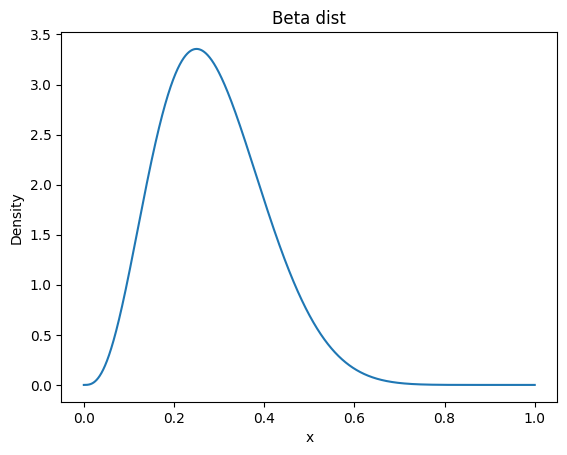

In [3]:
def plot_beta_dist(beta: BetaDistribution):
    """
    Plots the probability density function of the given beta distribution.

    Args:
        beta (BetaDistribution): The beta distribution instance to plot.
    """
    ######################  TODO  ########################
    # Do not forget to add title, labels, and legend.
    x = np.linspace(0, 1, 10000)
    y = beta.pdf(x)
    plt.plot(x, y)
    plt.title('Beta dist') 
    plt.xlabel('x') 
    plt.ylabel('Density') 
    plt.show()  
    ######################  TODO  ########################
beta_dist = BetaDistribution(4, 10) 
plot_beta_dist(beta_dist)


Read the `coint_flips.txt` file and plot the posterior distributions after every 50 trials for two prior probabilities:
1. Uniform distribution 
2. $Beta (4, 10)$

In [4]:
######################  TODO  ########################
# Read coin_flips.txt
# 1 is head 0 is tail
coin_flips = []
file=open('data/coin_flips.txt', 'r')
for line in file:
        if line.strip() == 'H':
            coin_flips.append(1)
        elif line.strip() == 'T':
            coin_flips.append(0)



######################  TODO  ########################

## Prior: Uniform

**Hint:** use `plt.figure(figsize=(25, 20))` and `plt.subplot(4, 5, ...)`

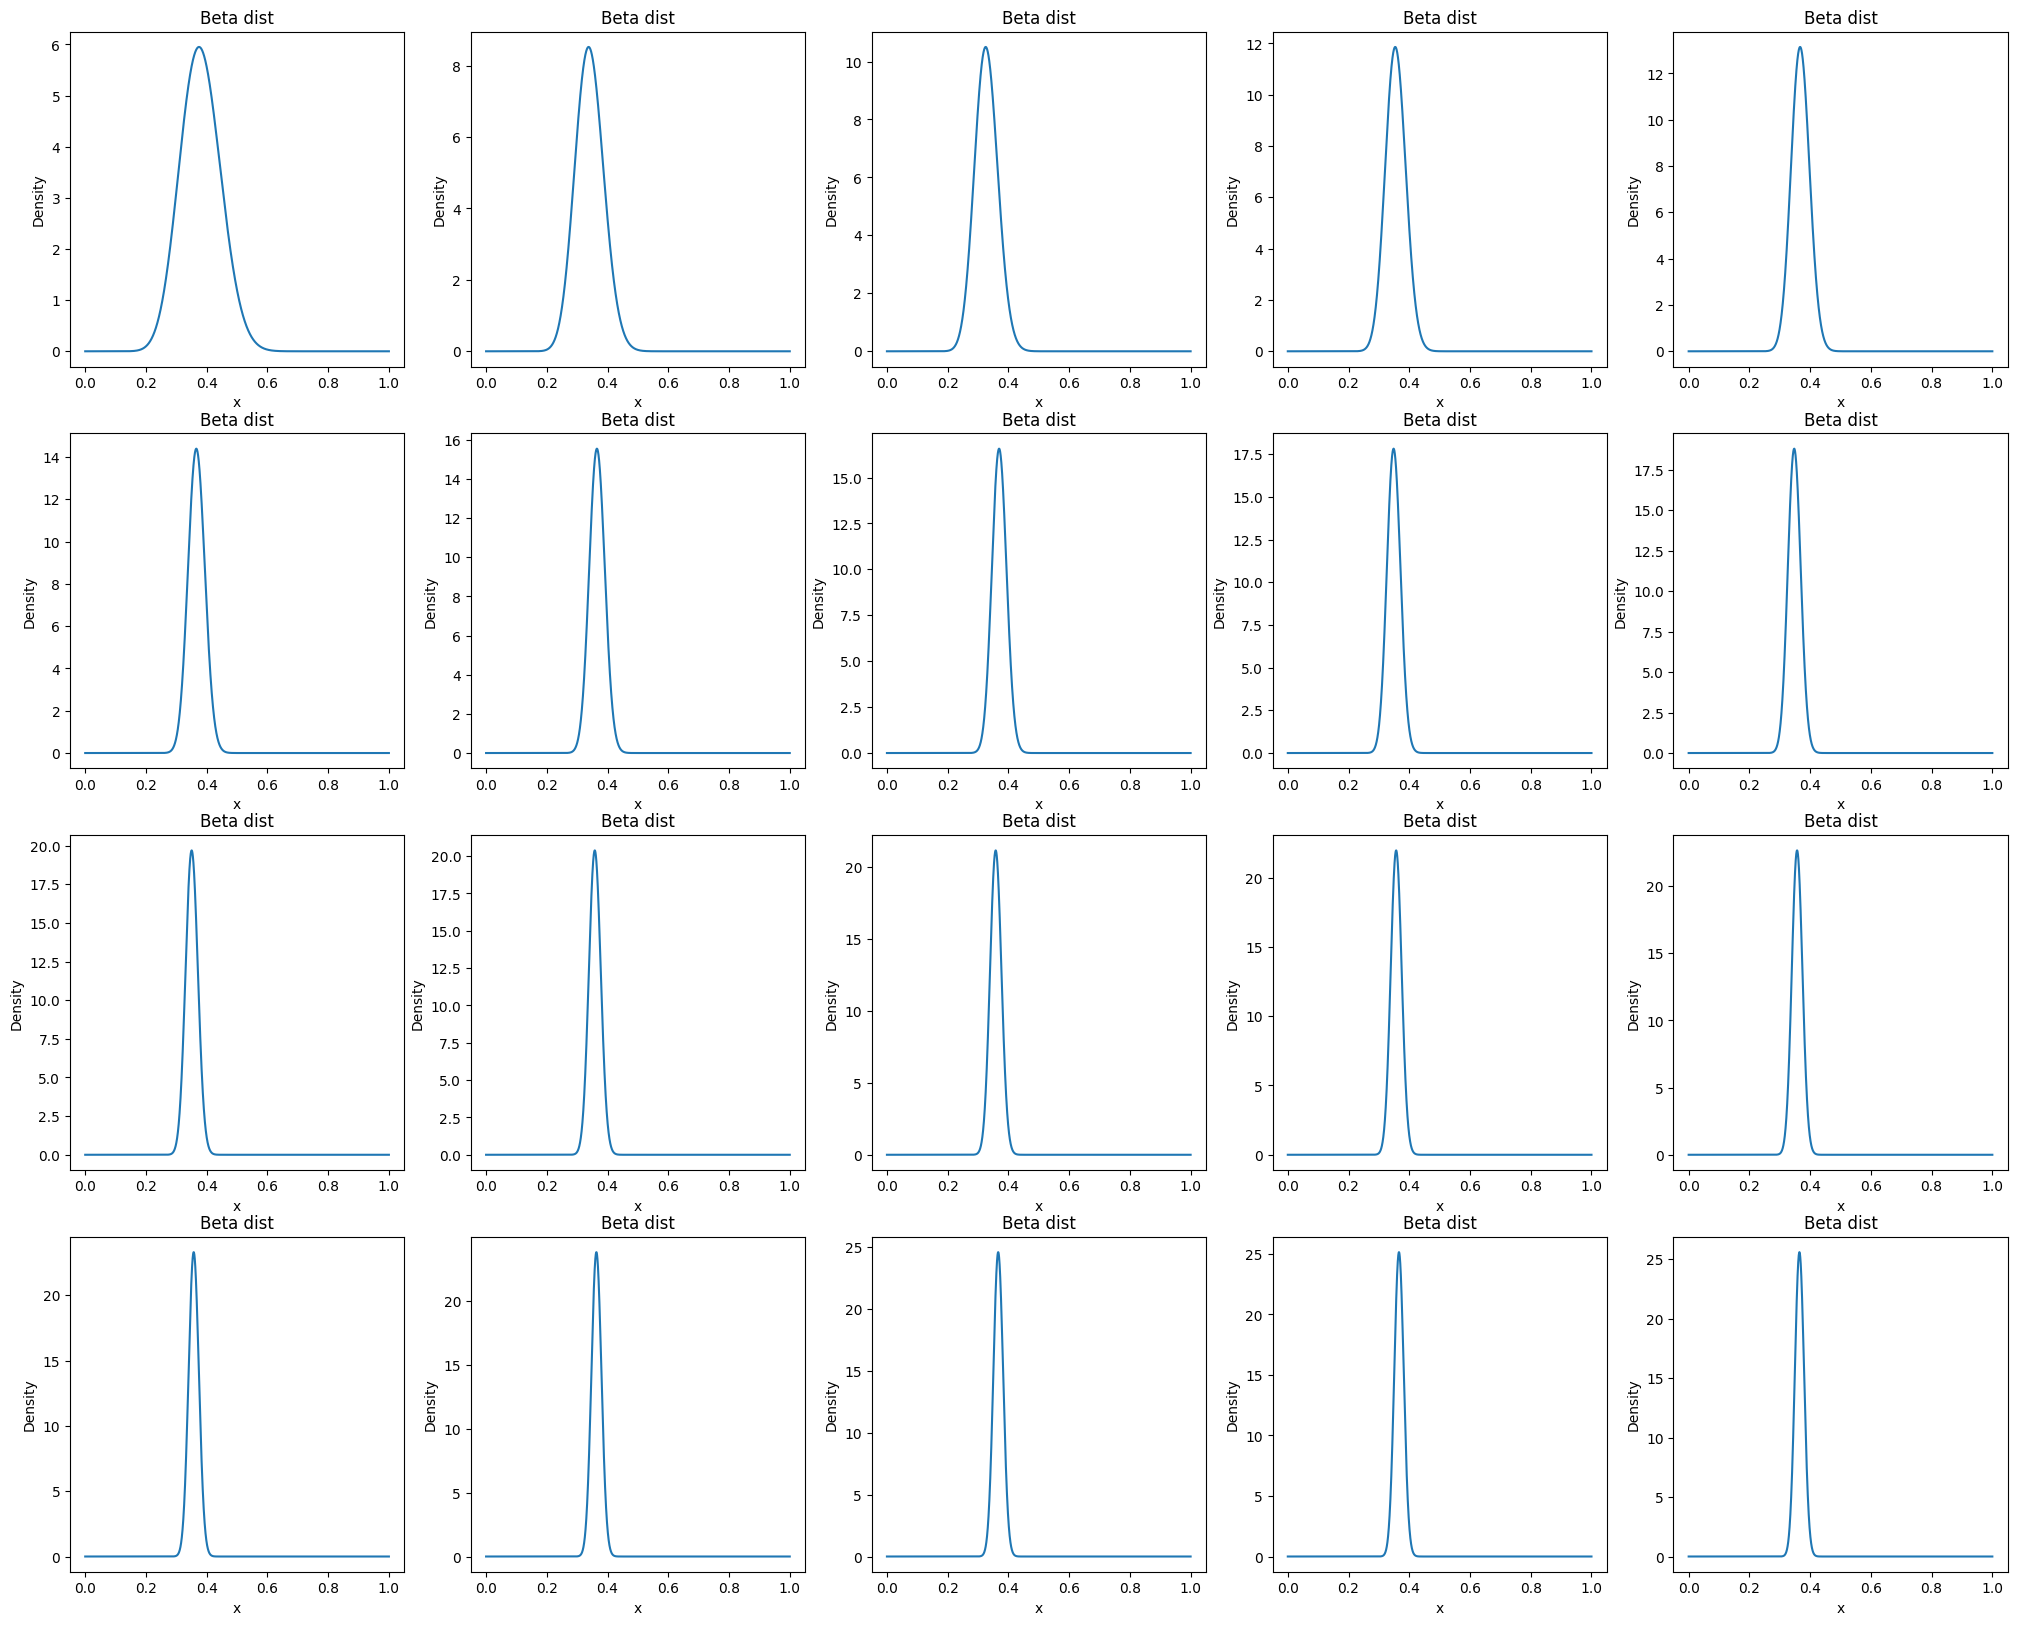

In [16]:
######################  TODO  ########################
alpha=1
beta=1.7
plt.figure(figsize=(25, 20))
for i in range(0, len(coin_flips), 50):
    fiftyflip = coin_flips[:i+50]
    post_alpha= alpha+sum(fiftyflip)
    post_beta = beta+len(fiftyflip)-sum(fiftyflip)
    plt.subplot(4, 5, int(i/50)+1)
    # print(post_beta,post_alpha)
    # print(alpha,beta)
    beta_dist = BetaDistribution(post_alpha,post_beta)
    x = np.linspace(0, 1, 10000)
    y = beta_dist.pdf(x)
    plt.plot(x, y)
    plt.title('Beta dist') 
    plt.xlabel('x') 
    plt.ylabel('Density') 
plt.show()  
    


######################  TODO  ########################

Now calculate the final posterior mean and variance.

In [19]:
######################  TODO  ########################
def final_E_var(alpha, beta):
    mean = alpha / (alpha + beta)
    variance = (alpha * beta) / ((alpha + beta)**2 * (alpha + beta + 1))
    return mean, variance

mean,variance = final_E_var(post_alpha,post_beta)
print("the final mean is:",mean)
print("the final variance is:",variance)
######################  TODO  ########################

the final mean is: 0.36501446095542034
the final variance is: 0.00023092448365930483


## Prior: $Beta(4, 10)$

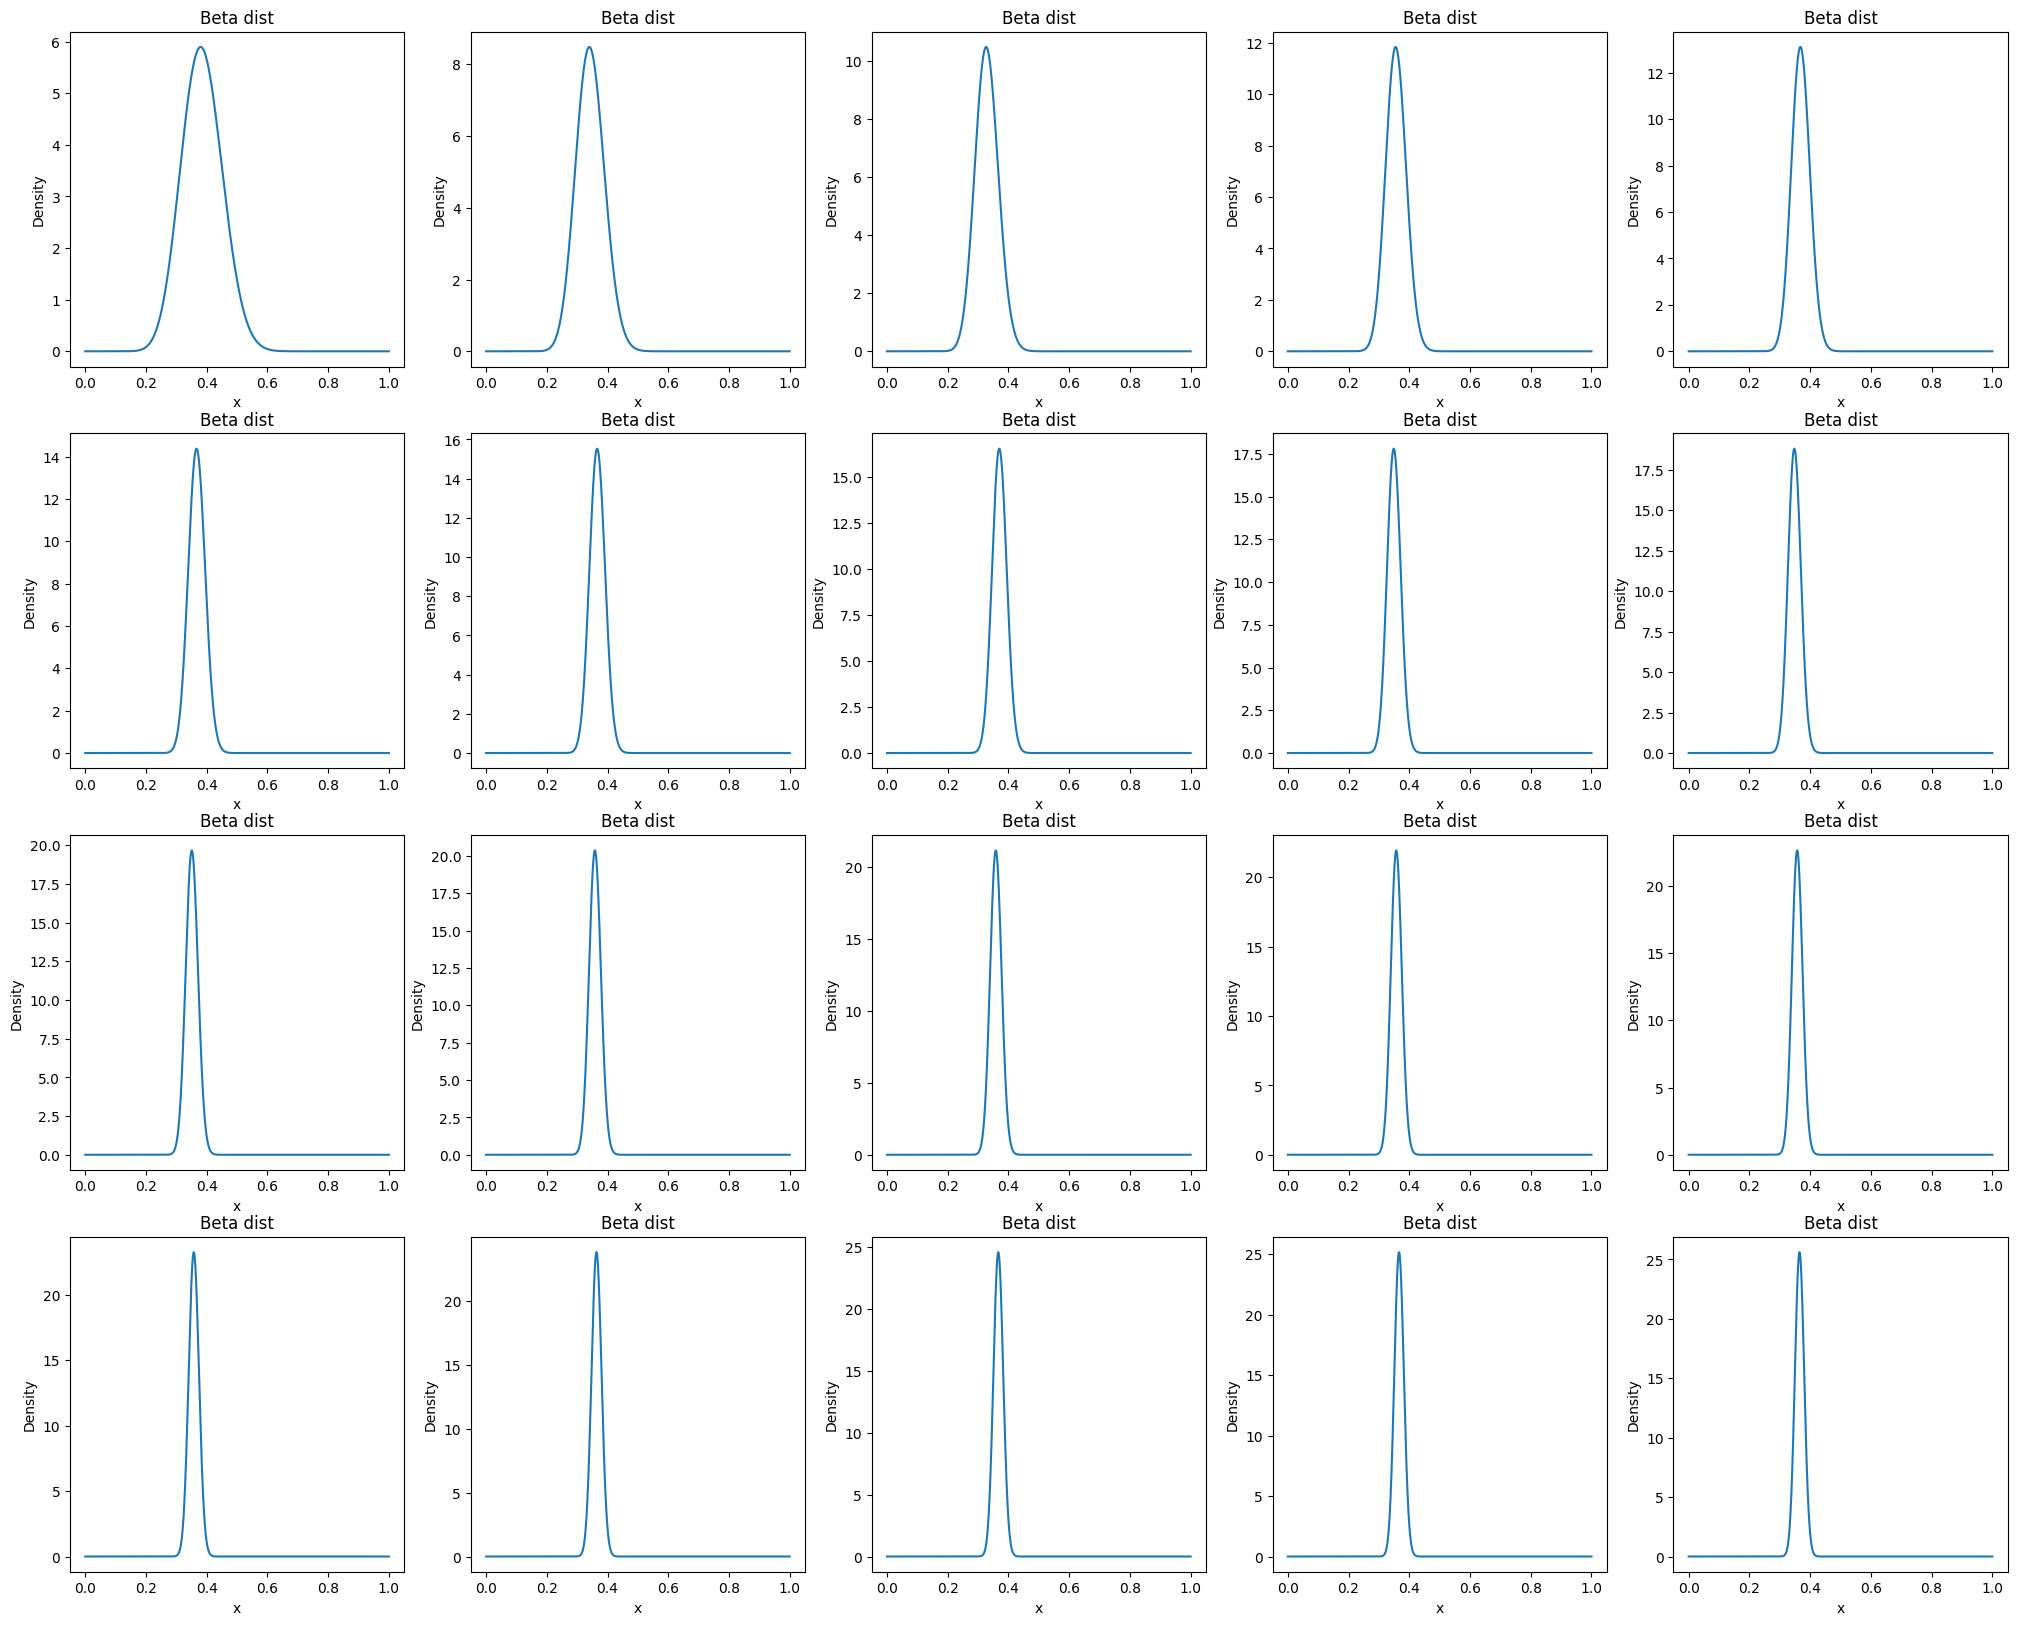

In [12]:
######################  TODO  ########################
alpha=1
beta=1
plt.figure(figsize=(25, 20))
for i in range(0, len(coin_flips), 50):
    fiftyflip = coin_flips[:i+50]
    post_alpha= alpha+sum(fiftyflip)
    post_beta = beta+len(fiftyflip)-sum(fiftyflip)
    plt.subplot(4, 5, int(i/50)+1)
    # print(post_beta,post_alpha)
    # print(alpha,beta)
    beta_dist = BetaDistribution(post_alpha,post_beta)
    x = np.linspace(0, 1, 10000)
    y = beta_dist.pdf(x)
    plt.plot(x, y)
    plt.title('Beta dist') 
    plt.xlabel('x') 
    plt.ylabel('Density') 
plt.show()  
    


######################  TODO  ########################

Now calculate the final posterior mean and variance.

In [13]:
######################  TODO  ########################
mean,variance = final_E_var(post_alpha,post_beta)
print("the final mean is:",mean)
print("the final variance is:",variance)
######################  TODO  ########################

the final mean is: 0.3652694610778443
the final variance is: 0.00023115421922407326


## Summary:
first a inital alpha beta is used which acts as a prior belief about the probabilty of getting heads then 50 by 50 the beta distributation is updated and as it updates our estimation(which is E[x]=a/a+b) gets closer to the final answer, with Beta(1,1) there no inital bias so the result will be less accurate at first but as we gather more information(more prior knowledge) the result will become more accurate on the other hand if we use beta(4,10) for smaller samples our result will be more accurate because of the bias but once we have enough information that extra inital bias will become exccesive. 